In [2]:
import pandas  as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from numpy import arange
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

# MNIST data

In [2]:
X_mn, y_mn = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X_mn.shape

(70000, 784)

In [5]:
df_mn = pd.DataFrame(X_mn, columns = [i for i in range (784)])

In [6]:
y_mn

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y_mn = y_mn.astype(int)

In [8]:
y_mn

array([5, 0, 4, ..., 4, 5, 6])

In [9]:
df_mn['target']=y_mn

In [10]:
df_mn.shape

(70000, 785)

In [11]:
df_mn.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [12]:
df_mn.drop( df_mn[ df_mn['target']>4].index , inplace=True)

In [13]:
df_mn.shape

(35735, 785)

In [14]:
y_mn_n = df_mn['target']

In [15]:
x_mn_n = df_mn.drop('target', axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_mn_n, y_mn_n, test_size=0.1, random_state=1)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.22222, random_state=1) 
# 0.9*x=0.2

In [18]:
X_train.shape

(25014, 784)

In [19]:
X_train.iloc[1000]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
Name: 22757, Length: 784, dtype: float64

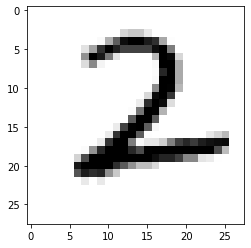

In [29]:
import matplotlib
some_digit = X_train.iloc[1040]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation='nearest')
plt.axis=('off')

# For KNN 

In [22]:
clf_k =  KNeighborsClassifier(n_neighbors= 20)

In [26]:
clf_k.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
# parameters = {'n_neighbors':[15,20]}

In [24]:
# clf_k_fin = GridSearchCV(clf_k, parameters)

In [ ]:
# clf_k_fin.fit(X_train, y_train)

In [ ]:
# clf_k_fin.get_params()

{'cv': None,
 'error_score': nan,
 'estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'n_neighbors': [10, 100]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
accu_k_val= clf_k.score(X_val, y_val)

In [ ]:
accu_k = clf_k.score(X_test, y_test)

In [ ]:
# accu_k = clf_k_fin.score(X_test)

In [ ]:
accu_k

0.9865696698377169

# Using mlp

In [ ]:
clf_mlp = MLPClassifier(max_iter=100)

In [ ]:
clf_mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# parameters = {'learning_rate':[0.001, 0.01, 0.1], 'max_iter':[200,300,400]}

In [ ]:
# clf_mlp_fin= GridSearchCV(clf_mlp, parameters)

In [ ]:
# clf_mlp_fin.fit(X_train, y_train)

In [ ]:
# clf_mlp_fin.get_params()

In [ ]:
# accu_mlp = clf_mlp_fin.score(X_test)

In [ ]:
accu_mlp = clf_mlp.score(X_test, y_test)

In [ ]:
accu_mlp

0.9868494683827644

# Using SVM

In [ ]:
clf_svm = svm.SVC(C=5)

In [ ]:
clf_svm.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# parameters = {'C':[1,2,4,8,10]}

In [ ]:
# clf_svm_fin= GridSearchCV(clf_svm, parameters)

In [ ]:
# clf_svm_fin.fit(X_train, y_train)

In [ ]:
# clf_svm_fin.get_params()

In [ ]:
# accu_svm = clf_svm_fin.score(X_test)

In [ ]:
accu_svm = clf_svm.score(X_test, y_test)

In [ ]:
accu_svm

0.9941242305540011

# Normalised data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
scaler.fit(X_val)
X_val= scaler.transform(X_val)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
# knn
clf_k_nor =  KNeighborsClassifier(n_neighbors= 20)
# parameters = {'n_neighbors':[i for i in range (15,20)]}
# clf_k_fin_nor = GridSearchCV(clf_k_nor, parameters)
clf_k_nor.fit(X_train, y_train)
# clf_k_fin_nor.best_estimator

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
# clf_k_fin_nor.get_params()

In [ ]:
accu_k_nor = clf_k_nor.score(X_test, y_test)

In [ ]:
accu_k_nor

0.9700615556799105

In [ ]:
# mlp
clf_mlp_nor = MLPClassifier(max_iter= 100)
# parameters = {'learning_rate':[0.001, 0.01, 0.1], 'max_iter':[200,300,400]}
# clf_mlp_fin_nor= GridSearchCV(clf_mlp_nor, parameters)
clf_mlp_nor.fit(X_train, y_train)
# clf_mlp_fin_nor.get_params()

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
accu_mlp_nor = clf_mlp_nor.score(X_test, y_test)

In [ ]:
accu_mlp_nor

0.9879686625629547

In [ ]:
# svm
clf_svm_nor = svm.SVC(C=5)
# parameters = {'C':[1,2,4,8,10]}
# clf_svm_fin_nor= GridSearchCV(clf_svm_nor, parameters)
clf_svm_nor.fit(X_train, y_train)
# clf_svm_fin_nor.get_params()

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
accu_svm_nor = clf_svm_nor.score(X_test, y_test)

In [ ]:
accu_svm_nor

0.9826524902070509

# Comparison

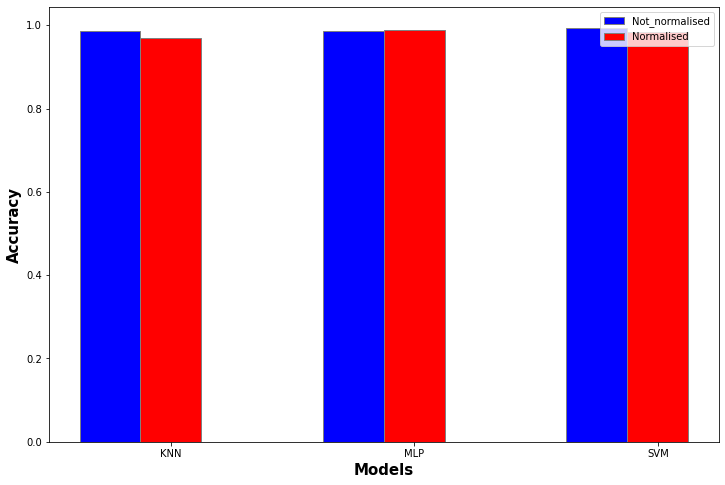

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Not_normalised = [accu_k, accu_mlp, accu_svm]
Normalised = [accu_k_nor,accu_mlp_nor,accu_svm_nor]
 
# Set position of bar on X axis
br1 = np.arange(len(Not_normalised))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, Not_normalised, color ='b', width = barWidth, edgecolor ='grey', label ='Not_normalised')
plt.bar(br2, Normalised, color ='r', width = barWidth, edgecolor ='grey', label ='Normalised')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Not_normalised))],['KNN', 'MLP', 'SVM'])
 
plt.legend()
plt.show()

# OVO and OVA

In [30]:
clf_ova_svm = OneVsRestClassifier(svm.SVC()).fit(X_train, y_train)

In [ ]:
accu_ova_svm = clf_ova_svm.score(X_test, y_test)

In [ ]:
accu_ova_svm

0.9798545047565753

In [ ]:
clf_ovo_svm = clf = OneVsOneClassifier(svm.SVC()).fit(X_train, y_train)
    

In [ ]:
accu_ovo_svm = clf_ovo_svm.score(X_test, y_test)

In [ ]:
accu_ovo_svm

0.9924454392837158

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Classifiers = ['OVA', 'OVO']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

# Diabetes

In [4]:
diab_data = pd.read_csv("/content/diabetes.csv")

In [5]:
diab_data.shape

(768, 9)

In [6]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
y= diab_data["Outcome"]

In [8]:
X= diab_data.drop('Outcome', axis=1)

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X= scaler.transform(X)

In [12]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [13]:
X.shape

(768, 8)

In [14]:
type(X)

numpy.ndarray

In [15]:
X = pd.DataFrame(X, columns = ['Pregnancies',	'Glucose','BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction', 	'Age'])

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [17]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.22222, random_state=1) 
# 0.9*x=0.2

In [20]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
671,-0.844885,-0.685236,-0.574128,-0.660932,-0.692891,-0.836725,0.238963,-1.041549
116,0.342981,0.097192,0.253036,-1.288212,-0.692891,0.254780,-0.760696,0.404942
429,-0.844885,-0.810425,0.666618,0.279989,0.870031,0.381700,-0.721435,0.830381
264,0.046014,0.065895,-0.367337,-1.288212,-0.692891,0.000942,-0.742576,0.149679
43,1.530847,1.568158,2.114155,0.217261,1.391004,1.701660,0.752383,1.766346
...,...,...,...,...,...,...,...,...
697,-1.141852,-0.685236,-3.572597,-1.288212,-0.692891,-0.887493,-0.661032,-0.956462
387,1.233880,-0.497453,1.597178,0.969998,-0.692891,1.435129,-0.703314,1.000557
563,0.639947,-0.685236,-0.470732,-0.096379,-0.224014,-0.646346,0.075877,-0.105584
39,0.046014,-0.309671,0.149641,1.660007,1.104469,0.648230,2.772843,1.936522


In [21]:
y_train

671    0
116    1
429    1
264    1
43     1
      ..
697    0
387    1
563    0
39     1
502    1
Name: Outcome, Length: 537, dtype: int64

In [22]:
y_val

215    1
557    0
749    1
262    0
765    0
      ..
216    1
265    0
357    1
168    0
10     0
Name: Outcome, Length: 154, dtype: int64

In [23]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
699    0
680    0
754    1
23     1
394    1
Name: Outcome, Length: 77, dtype: int64

# Using linear kernel

In [24]:
# Linear kernel
clf = svm.SVC(kernel='linear')

In [25]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
# Accuracy On validation set
clf.score(X_val, y_val)

0.7597402597402597

In [27]:
clf.score(X_test, y_test)

0.7922077922077922

In [28]:
c_values = np.linspace(0.01, 10, 10)
c_values

array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])

In [29]:
scores = [cross_val_score(clf.set_params(C=c_value),X_train,y_train,cv=5) for c_value in c_values]

In [30]:
means = np.array([np.mean(score) for score in scores])
deviations = np.array([np.std(score) for score in scores])

Text(0, 0.5, 'mean_accuracy')

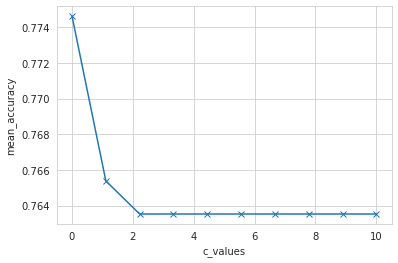

In [31]:
sns.set_style("whitegrid")
figure = plt.figure()
plt.plot(c_values, means,marker='x')
plt.xlabel('c_values')
plt.ylabel('mean_accuracy')

#using polynomial kernel


In [32]:
clf_poly = svm.SVC(kernel='poly')

In [33]:
clf_poly.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
clf_poly.score(X_val, y_val)

0.7597402597402597

In [35]:
clf_poly.score(X_test, y_test)

0.7402597402597403

In [36]:
scores = [cross_val_score(clf_poly.set_params(C=c_value),X_train,y_train,cv=5) for c_value in c_values]

In [37]:
means = np.array([np.mean(score) for score in scores])
deviations = np.array([np.std(score) for score in scores])

Text(0, 0.5, 'mean_accuracy')

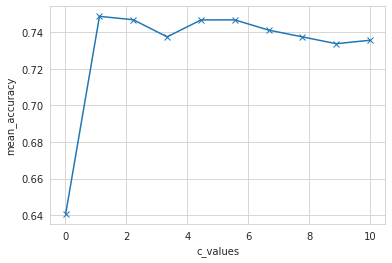

In [38]:
sns.set_style("whitegrid")
figure = plt.figure()
plt.plot(c_values, means,marker='x')
plt.xlabel('c_values')
plt.ylabel('mean_accuracy')

# Gaussian Kernel


In [39]:
clf_gauss = svm.SVC(kernel='rbf')

In [40]:
clf_gauss.fit(X_train , y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
clf_gauss.score(X_val, y_val)

0.7662337662337663

In [42]:
clf_gauss.score(X_test, y_test)

0.8181818181818182

In [43]:
scores = [cross_val_score(clf_gauss.set_params(C=c_value),X_train,y_train,cv=5) for c_value in c_values]

In [44]:
means = np.array([np.mean(score) for score in scores])
deviations = np.array([np.std(score) for score in scores])

Text(0, 0.5, 'mean_accuracy')

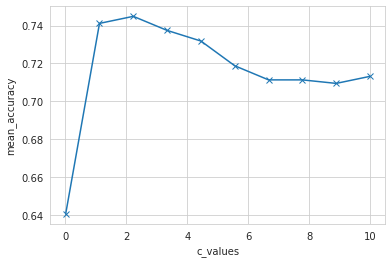

In [45]:
sns.set_style("whitegrid")
figure = plt.figure()
plt.plot(c_values, means,marker='x')
plt.xlabel('c_values')
plt.ylabel('mean_accuracy')

# Support vectors

In [46]:
clf_gauss_fin = svm.SVC(kernel='rbf', C= 2.23)

In [47]:
clf_gauss_fin.fit(X_train , y_train)

SVC(C=2.23, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
clf_gauss_fin.n_support_

array([156, 146], dtype=int32)

In [49]:
clf_poly_fin = svm.SVC(kernel='poly', C=1.12 )

In [50]:
clf_poly_fin.fit(X_train , y_train)

SVC(C=1.12, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
clf_poly_fin.n_support_

array([155, 150], dtype=int32)

In [52]:
clf_lin_fin = svm.SVC(kernel= 'linear', C=0.01)

In [53]:
clf_lin_fin.fit(X_train , y_train)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
clf_lin_fin.n_support_

array([172, 170], dtype=int32)

# Plots(Applying PCA)

In [55]:
pca = PCA(n_components=2)

In [56]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
X= pca.transform(X)

In [60]:
X.shape

(768, 2)

In [61]:
df_pca = pd.DataFrame(X, columns = ['PCA1','PCA2'])

In [62]:
df_pca.head()

,PCA1,PCA2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819


In [63]:
df_pca['outcome']=y

In [64]:
df_pca.head()

,PCA1,PCA2,outcome
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1


In [73]:
clf_gauss_pca= svm.SVC(kernel='rbf', C= 2.23)

In [74]:
y_train_pca = df_pca['outcome']

In [75]:
x_train_pca = df_pca.drop('outcome', axis=1)

In [76]:
clf_gauss_pca.fit(x_train_pca, y_train_pca)

SVC(C=2.23, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
# Generate a set of points that form a grid over feature space
x1s = np.linspace(min(df_pca.iloc[:, 0]), max(df_pca.iloc[:, 0]), 600)
x2s = np.linspace(min(df_pca.iloc[:, 1]), max(df_pca.iloc[:, 1]), 600)
points = np.array([[x1, x2] for x1 in x1s for x2 in x2s])

# Compute decision function for each point, keep those which are close to the boundary
dist_bias = clf_gauss_pca.decision_function(points)
bounds_bias = np.array([pt for pt, dist in zip(points, dist_bias) if abs(dist)<0.05])



Text(0.5, 1.0, 'Gaussian kernel')

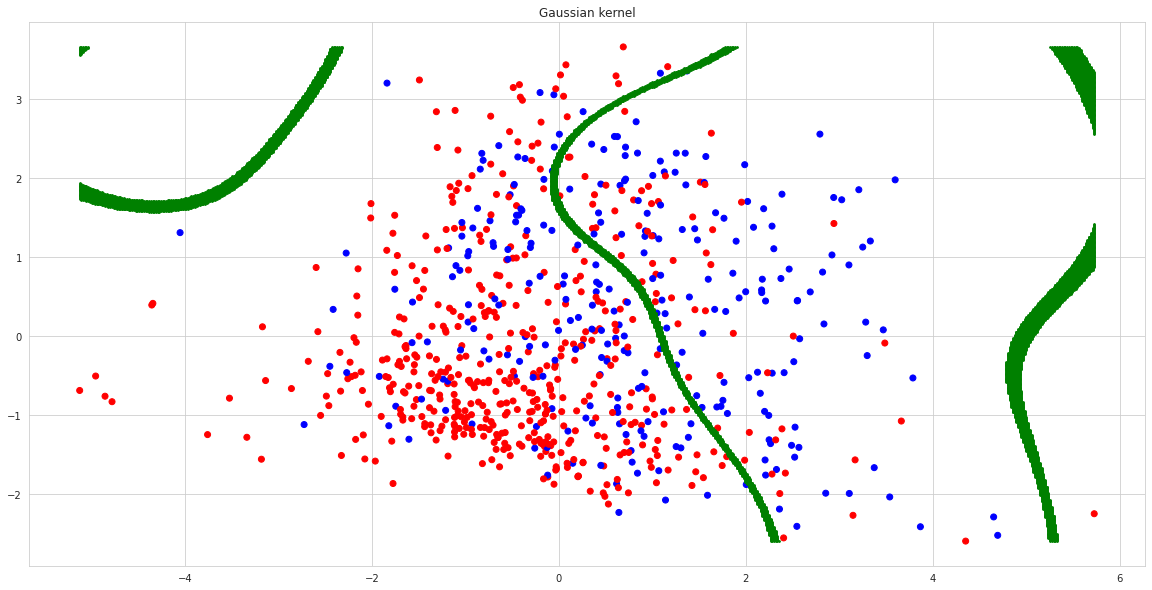

In [85]:
fig, ax1 = plt.subplots(figsize=[20, 10], nrows=1)

ax1.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], color=["r" if y == 0 else "b" for y in y_train_pca], label="data")
ax1.scatter(bounds_bias[:, 0], bounds_bias[:, 1], color="g", s=3, label="decision boundary")
ax1.set_title("Gaussian kernel")


In [83]:
clf_lin_pca = svm.SVC(kernel= 'linear', C=0.01)

In [84]:
clf_lin_pca.fit(x_train_pca, y_train_pca)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
dist_bias = clf_lin_pca.decision_function(points)
bounds_bias = np.array([pt for pt, dist in zip(points, dist_bias) if abs(dist)<0.05])

Text(0.5, 1.0, 'Linear kernel')

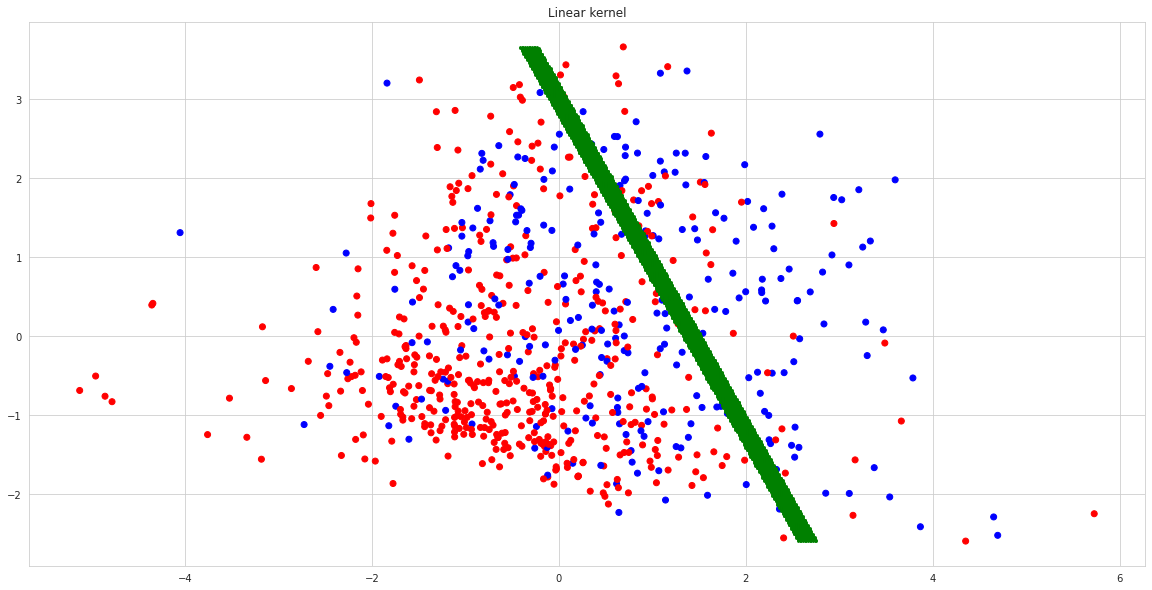

In [87]:
fig, ax1 = plt.subplots(figsize=[20, 10], nrows=1)

ax1.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], color=["r" if y == 0 else "b" for y in y_train_pca], label="data")
ax1.scatter(bounds_bias[:, 0], bounds_bias[:, 1], color="g", s=3, label="decision boundary")
ax1.set_title("Linear kernel")


In [88]:
clf_poly_pca = clf_lin_pca = svm.SVC(kernel= 'poly',C=1.12)

In [89]:
clf_poly_pca.fit(x_train_pca, y_train_pca)

SVC(C=1.12, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
dist_bias = clf_poly_pca.decision_function(points)
bounds_bias = np.array([pt for pt, dist in zip(points, dist_bias) if abs(dist)<0.05])

Text(0.5, 1.0, 'Polynomial kernel')

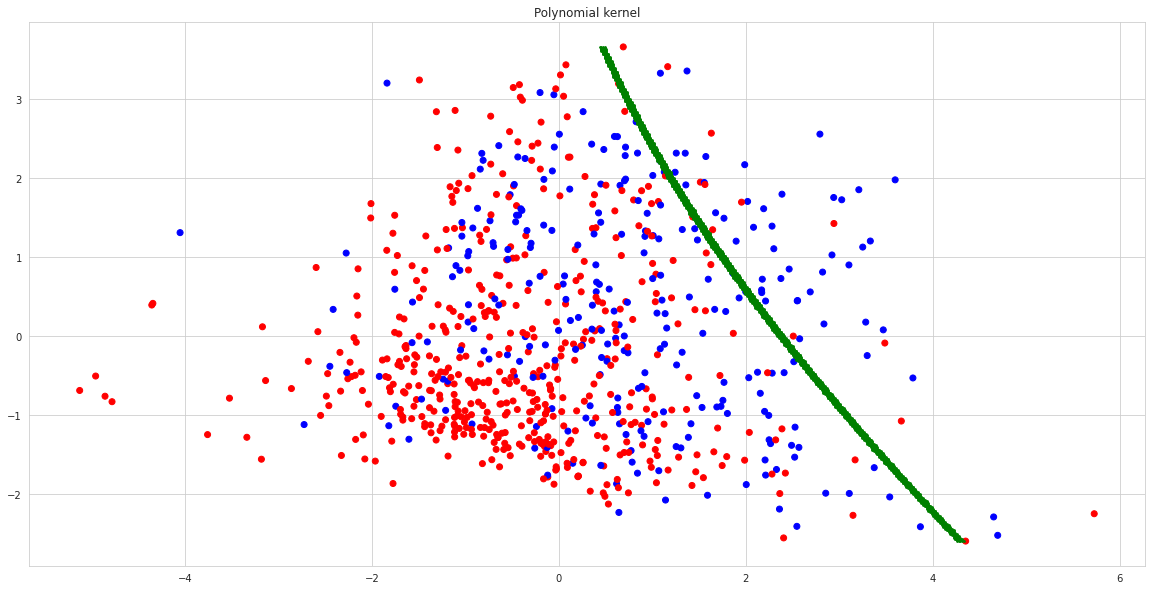

In [94]:
fig, ax1 = plt.subplots(figsize=[20, 10], nrows=1)

ax1.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], color=["r" if y == 0 else "b" for y in y_train_pca], label="data")
ax1.scatter(bounds_bias[:, 0], bounds_bias[:, 1], color="g", s=3, label="decision boundary")
ax1.set_title("Polynomial kernel")
